In [4]:
# Fashion MNIST

import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Expand dimensions to add the channel dimension (grayscale images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Modify the training and test data
def resize_and_pad(image, target_size=(28, 28), scale_factor=0.51):
    height, width, channels = image.shape[0], image.shape[1], image.shape[2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (target_size[0] - new_height) // 2
    pad_width = (target_size[1] - new_width) // 2

    # Create a new padded image with the target size
    if channels == 1:
        padded_image = np.zeros((target_size[0], target_size[1]), dtype=np.uint8)
    else:
        padded_image = np.zeros((target_size[0], target_size[1], channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    if channels == 1:
        padded_image = np.expand_dims(padded_image, axis=-1)

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Convert labels to one-hot encoding
num_classes = 10  # Fashion MNIST has 10 classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Define the model architecture
input_shape = (28, 28, 1)  # Input shape for Fashion MNIST images
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the original Fashion MNIST dataset
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the original Fashion MNIST dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on original, tested on original Fashion MNIST test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified Fashion MNIST dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on original, tested on modified Fashion MNIST test accuracy: {original_on_modified_scores[1] * 100:.2f}%')

# Train a new model on the modified Fashion MNIST dataset
model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_modified.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_modified.fit(x_train_modified, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the modified model on the original Fashion MNIST dataset
modified_on_original_scores = model_modified.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on modified, tested on original Fashion MNIST test accuracy: {modified_on_original_scores[1] * 100:.2f}%')

# Evaluate the modified model on the modified Fashion MNIST dataset
modified_on_modified_scores = model_modified.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on modified, tested on modified Fashion MNIST test accuracy: {modified_on_modified_scores[1] * 100:.2f}%')


Epoch 1/100
750/750 [==============================] - 11s 14ms/step - loss: 0.5821 - accuracy: 0.7855 - val_loss: 0.4261 - val_accuracy: 0.8407
Epoch 2/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3681 - accuracy: 0.8655 - val_loss: 0.3330 - val_accuracy: 0.8777
Epoch 3/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3118 - accuracy: 0.8859 - val_loss: 0.3230 - val_accuracy: 0.8819
Epoch 4/100
750/750 [==============================] - 10s 13ms/step - loss: 0.2778 - accuracy: 0.8976 - val_loss: 0.3072 - val_accuracy: 0.8881
Epoch 5/100
750/750 [==============================] - 10s 13ms/step - loss: 0.2571 - accuracy: 0.9043 - val_loss: 0.2756 - val_accuracy: 0.8981
Epoch 6/100
750/750 [==============================] - 10s 13ms/step - loss: 0.2342 - accuracy: 0.9123 - val_loss: 0.2677 - val_accuracy: 0.9028
Epoch 7/100
750/750 [==============================] - 10s 13ms/step - loss: 0.2158 - accuracy: 0.9191 - val_loss: 0.2634 - val_ac

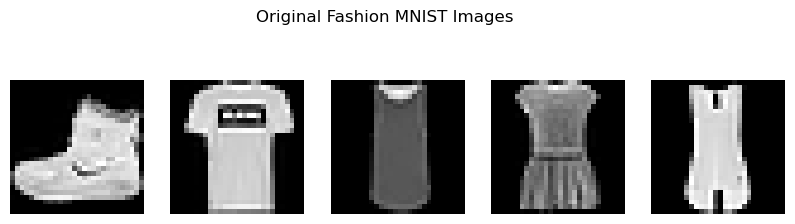

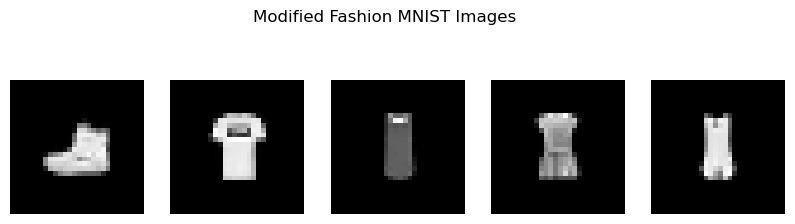

In [3]:
import matplotlib.pyplot as plt

# Function to plot images without labels
def plot_images(images, title):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        # Convert single-channel grayscale images to three-channel RGB images for visualization
        image = np.squeeze(images[i], axis=-1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot some images from the original Fashion MNIST dataset without labels
plot_images(x_train[:10], title='Original Fashion MNIST Images')

# Plot some images from the modified Fashion MNIST dataset without labels
plot_images(x_train_modified[:10], title='Modified Fashion MNIST Images')

In [20]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Expand dimensions to add the channel dimension (grayscale images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Modify the training and test data
def resize_and_pad(image, target_size=(28, 28), scale_factor=0.51):
    height, width, channels = image.shape[0], image.shape[1], image.shape[2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (target_size[0] - new_height) // 2
    pad_width = (target_size[1] - new_width) // 2

    # Create a new padded image with the target size
    if channels == 1:
        padded_image = np.zeros((target_size[0], target_size[1]), dtype=np.uint8)
    else:
        padded_image = np.zeros((target_size[0], target_size[1], channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    if channels == 1:
        padded_image = np.expand_dims(padded_image, axis=-1)

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Concatenate the original and modified data
x_train_combined = np.concatenate((x_train, x_train_modified), axis=0)
y_train_combined = np.concatenate((y_train, y_train), axis=0)

# Convert labels to one-hot encoding
num_classes = 10  # Fashion MNIST has 10 classes
y_train_combined = tf.keras.utils.to_categorical(y_train_combined, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Define the model architecture
input_shape = (28, 28, 1)  # Input shape for Fashion MNIST images
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the combined dataset
model.fit(x_train_combined, y_train_combined, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the original Fashion MNIST dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on combined, tested on original Fashion MNIST test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified Fashion MNIST dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on combined, tested on modified Fashion MNIST test accuracy: {original_on_modified_scores[1] * 100:.2f}%')


Epoch 1/100
1500/1500 [==============================] - 76s 47ms/step - loss: 0.5743 - accuracy: 0.7905 - val_loss: 0.4572 - val_accuracy: 0.8338
Epoch 2/100
1500/1500 [==============================] - 69s 46ms/step - loss: 0.3699 - accuracy: 0.8654 - val_loss: 0.3865 - val_accuracy: 0.8612
Epoch 3/100
1500/1500 [==============================] - 69s 46ms/step - loss: 0.3209 - accuracy: 0.8825 - val_loss: 0.3503 - val_accuracy: 0.8705
Epoch 4/100
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2878 - accuracy: 0.8927 - val_loss: 0.3185 - val_accuracy: 0.8827
Epoch 5/100
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2625 - accuracy: 0.9030 - val_loss: 0.3090 - val_accuracy: 0.8858
Epoch 6/100
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2421 - accuracy: 0.9099 - val_loss: 0.2908 - val_accuracy: 0.8947
Epoch 7/100
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2252 - accuracy: 0.9163 - val_loss: 0